In [1]:
#from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
#from nltk.tokenize import word_tokenize
import spacy
import spacy.cli 
import pandas as pd
import matplotlib.pyplot as plt

#import nltk
#nltk.download('punkt_tab')
#nltk.download('wordnet')
#nltk.download('stopwords')

In [29]:
#get data 
rahmen_df = pd.read_csv('./data/kv_contracts_rahmen_all_years.csv')

In [15]:
#only look at first contract for now
example = rahmen_df.loc[0:1,:]

In [21]:
#lemmatize the text in the contracts using spacy and the "de_core_news_md" package
#takes about 4 hours
#spacy.cli.download("de_core_news_md")

nlp = spacy.load('de_core_news_md')
rahmen_df['lemmatized_text'] = rahmen_df['subcontract_text'].apply(lambda x: [token.lemma_ for token in nlp(x)])


In [27]:
#put everything in lowercase
rahmen_df['lemmatized_text'] = rahmen_df['lemmatized_text'].apply(lambda word_list: [word.lower() for word in word_list])

In [2]:
#save so we don't have to do it all again
#rahmen_df.to_csv('./data/kv_contracts_rahmen_lemmatized_small_all_years.csv', index=False)
rahmen_df = pd.read_csv('./data/kv_contracts_rahmen_lemmatized_small_all_years.csv')

In [3]:
nlp = spacy.load('de_core_news_md')

words_to_search = ['urlaub', 'gehalt', 'kündigung', 'flexibel', 'arbeitszeit', 'abfertigung', 'karenz', 'weiterbildung', 'kinder', 'teilzeit', 'krankheit']

lemmatized_search_words = [token.lemma_.lower() for word in words_to_search for token in nlp(word)]

def count_word_frequency(row, word):
    return row.count(word)

for word in lemmatized_search_words:
    rahmen_df[f'freq_{word}'] = rahmen_df['lemmatized_text'].apply(lambda row: count_word_frequency(row, word))
    #example[f'freq_{word}'] = example['lemmatized_text'].apply(lambda row: count_word_frequency(row, word))

#add length of contract
rahmen_df['word_count'] = rahmen_df['lemmatized_text'].apply(len)

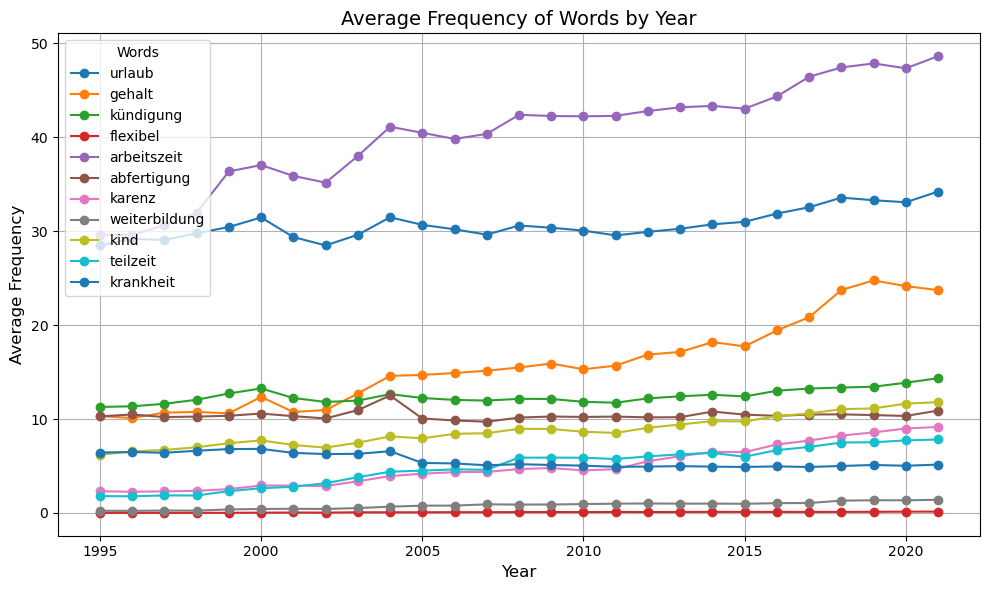

In [8]:
#development of frequency of words by year
frequency_columns = [f'freq_{word}' for word in lemmatized_search_words]

average_freq_by_year = rahmen_df.groupby('year')[frequency_columns].mean()
plt.figure(figsize=(10, 6))

for word in lemmatized_search_words:
    plt.plot(average_freq_by_year.index, average_freq_by_year[f'freq_{word}'], marker='o', label=word)

plt.title('Average Frequency of Words by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Frequency', fontsize=12)
plt.legend(title='Words')
plt.grid(True)
plt.tight_layout()

plt.savefig("./output/word_frequencies_year.png", dpi=300, bbox_inches='tight')

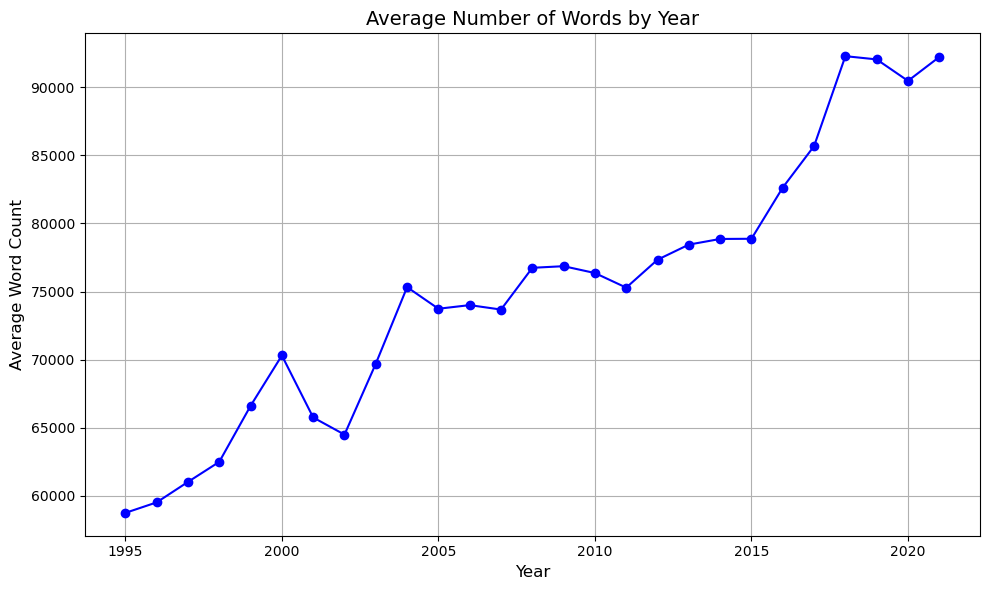

In [9]:
#average length of contract per year
average_word_count_by_year = rahmen_df.groupby('year')['word_count'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_word_count_by_year.index, average_word_count_by_year, marker='o', color='blue', label='Average Word Count')
plt.title('Average Number of Words by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Word Count', fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.savefig("./output/number_words_year.png", dpi=300, bbox_inches='tight')

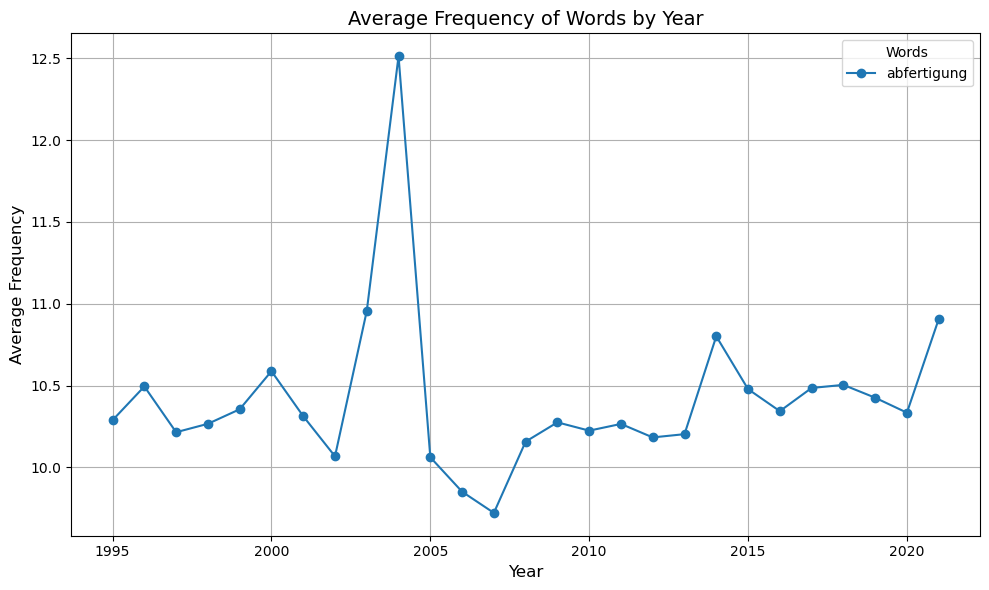

In [10]:
#development of frequency of words by year
frequency_columns = [f'freq_{word}' for word in lemmatized_search_words]

average_freq_by_year = rahmen_df.groupby('year')[frequency_columns].mean()
plt.figure(figsize=(10, 6))

plt.plot(average_freq_by_year.index, average_freq_by_year['freq_abfertigung'], marker='o', label='abfertigung')

plt.title('Average Frequency of Words by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Frequency', fontsize=12)
plt.legend(title='Words')
plt.grid(True)
plt.tight_layout()
